In [103]:
%matplotlib inline
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 10)
import numpy as np
import seaborn as sns

ERROR:root:Line magic function `%install_ext` not found.


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 12.8 ms


# EDA
## Load Data

In [104]:
Posts = pd.read_csv('/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/300000_rows/Posts.csv', \
                    dtype = {'LastEditorDisplayName': str, 'Tags': str})

time: 4.55 s


## Check NA of Posts

Text(0.5,1,'Posts NA')

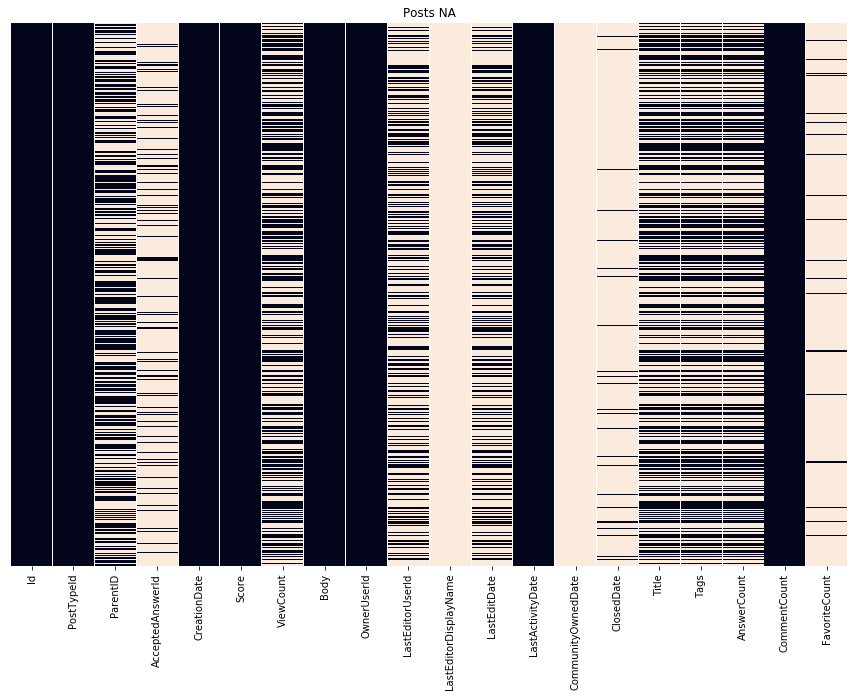

In [17]:
sns.heatmap(Posts.isnull(), yticklabels=False, cbar=False)
plt.title('Posts NA')

In [105]:
Posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299999 entries, 0 to 299998
Data columns (total 20 columns):
Id                       299999 non-null int64
PostTypeId               299999 non-null int64
ParentID                 152190 non-null float64
AcceptedAnswerId         41108 non-null float64
CreationDate             299999 non-null object
Score                    299999 non-null int64
ViewCount                147447 non-null float64
Body                     299813 non-null object
OwnerUserId              299597 non-null float64
LastEditorUserId         115234 non-null float64
LastEditorDisplayName    116 non-null object
LastEditDate             115344 non-null object
LastActivityDate         299999 non-null object
CommunityOwnedDate       239 non-null object
ClosedDate               10922 non-null object
Title                    147447 non-null object
Tags                     147447 non-null object
AnswerCount              147447 non-null float64
CommentCount             29999

# Timely Collaboration and Values
## Answers Posts

In [106]:
import datetime
import calendar

#date to timestamp
def date_ts(s):
    """ 
    param s: str - date
    returns: int - timestamp
    """
    date = datetime.datetime.strptime(s, "%Y-%m-%dT%H:%M:%S")
    st = calendar.timegm(date.utctimetuple())
    return(st)

time: 3.34 ms


In [107]:
df_answers = Posts[Posts.PostTypeId == 2]

time: 50.8 ms


In [108]:
df_answers = df_answers.reset_index(drop=True)

time: 25.7 ms


In [109]:
df_answers.CreationDate = df_answers.CreationDate.str[:-4]

time: 52 ms


In [110]:
unix_ans = [date_ts(i) for i in df_answers.CreationDate]

time: 2.08 s


In [111]:
df_answers_time = pd.DataFrame({'ParentID':df_answers.ParentID, 'Cr_time':unix_ans})

time: 32.8 ms


In [112]:
df_list = df_answers_time.groupby(df_answers_time.ParentID)

time: 112 ms


In [113]:
uni_par_id = list(df_answers_time.ParentID.unique())

time: 15.8 ms


In [114]:
ans_date = [list(df_list.get_group(i).Cr_time) for i in uni_par_id]

time: 30.8 s


In [115]:
one = 0
two = 0
three = 0
fourplus = 0

for i in ans_date:
    if len(i) == 1:
        one += 1
    elif len(i) == 2:
        two += 1
    elif len(i) == 3:
        three += 1
    else:
        fourplus += 1
        
print(one, two, three, fourplus)

#there are 2917 posts with only 1 answer, 15773 posts with more than 1 answers.

87571 19333 5244 2297
time: 50.7 ms


## One Answer Post average time

In [148]:
#only count post with 1 answer
#long run time
ans_date_1 = []
post_index_1 = []
for i in ans_date:
    if len(i) == 1:
        ans_date_1.append(i)
        post_index_1.append(ans_date.index(i))

time: 7min 49s


In [136]:
post_Id_1 = [df_answers.ParentID[i] for i in post_index_1]

time: 1.28 s


In [149]:
ans_date_1 = [i[0] for i in ans_date_1]

time: 13.1 ms


In [176]:
#Parent Post ID with only one answer
par_id_1 = pd.Series(post_Id_1)
#Answer Post time 
ans_date_1 = pd.Series(ans_date_1)

time: 9.73 ms


time: 34.3 ms


In [201]:
df_ans_1 = pd.DataFrame({'Id':par_id_1,'ans_date_1':ans_date_1})

time: 2.35 ms


In [202]:
df_ans_1.head()

,Id,ans_date_1
0,48869547.0,1519059950
1,48869547.0,1519059950
2,48870539.0,1519059951
3,48870631.0,1519059993
4,13830392.0,1519060000


time: 7.57 ms


In [203]:
df_ques = Posts[Posts.PostTypeId == 1]
df_ques = df_ques[['Id','CreationDate']]

time: 28.8 ms


In [206]:
df_ques['CreationDate'] = df_ques.CreationDate.str[:-4]

time: 250 ms


In [207]:
df_ques['CreationDate'] = df_ques.CreationDate.apply(date_ts)

time: 2 s


In [214]:
#df with Parent post Id and question post time (1 answer question)
df_ques.head()

,Id,CreationDate
0,48870881,1519059948
1,48870882,1519059949
5,48870886,1519059952
6,48870888,1519059961
8,48870890,1519059966


time: 6.85 ms


In [215]:
#df with Parent post Id and answer post time (1 answer question)
df_ans_1.head()

,Id,ans_date_1
0,48869547.0,1519059950
1,48869547.0,1519059950
2,48870539.0,1519059951
3,48870631.0,1519059993
4,13830392.0,1519060000


time: 7.59 ms


In [217]:
df_que_ans_1 = pd.merge(df_ques, df_ans_1, on = 'Id')

time: 71.3 ms


In [221]:
df_que_ans_1['response_time'] =  df_que_ans_1.ans_date_1 - df_que_ans_1.CreationDate

time: 1.9 ms


In [235]:
#Response time mean and median
res_time_mean = df_que_ans_1.response_time.mean()
res_time_median = df_que_ans_1.response_time.median()
print((res_time_mean/1000)/60,(res_time_median/1000)/60)

4.03474166847 3.52828333333
time: 4.58 ms


{'boxes': [<matplotlib.lines.Line2D at 0x1a1b04d908>],
 'caps': [<matplotlib.lines.Line2D at 0x1a3db936a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a3dbb8358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a3db93ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1b04d748>,
  <matplotlib.lines.Line2D at 0x1a3db93278>]}

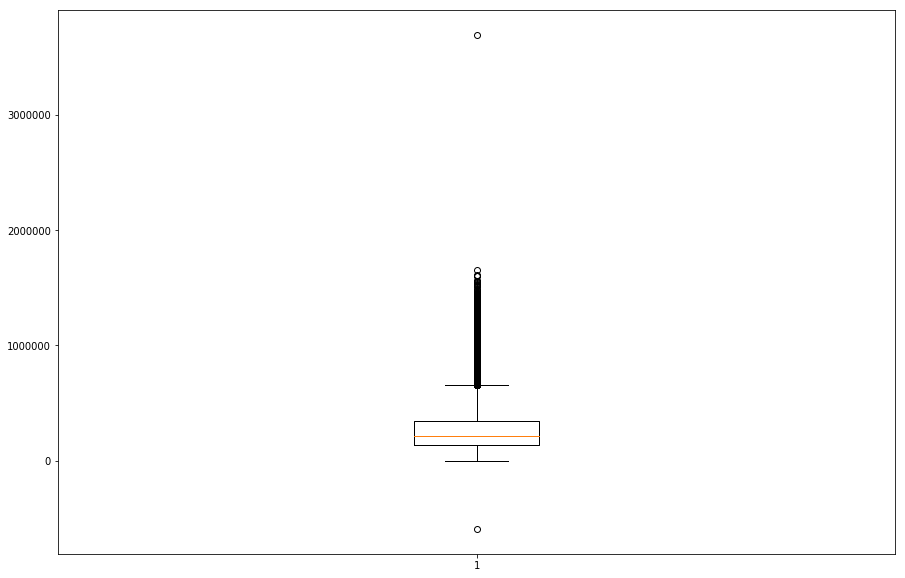

time: 208 ms


In [236]:
plt.boxplot(df_que_ans_1.response_time)

## SD Calculation of Post with 4+ answers

In [116]:
#only count post with 3+ answers
ans_date_3plus = []
post_index = []
for i in ans_date:
    if len(i) >= 3:
        ans_date_3plus.append(i)
        post_index.append(ans_date.index(i))

time: 10.8 s


In [120]:
import statistics
ans_time_sd = [statistics.stdev(i) for i in ans_date_3plus]

time: 581 ms


In [121]:
#post_Id = sorted(list(df_answers.ParentID.unique()))

time: 709 µs


In [122]:
post_Id = [df_answers.ParentID.unique()[i] for i in post_index]

time: 51 s


In [123]:
post_ans_sd = pd.DataFrame({'post_Id':post_Id, 'time_sd':ans_time_sd})

time: 3.3 ms


In [124]:
post_ans_sd.head(10)

,post_Id,time_sd
0,48870253.0,337954.962314
1,48868692.0,465755.790178
2,48870914.0,254.095127
3,48714990.0,131208.088814
4,48870838.0,155926.496608
5,48870288.0,24838.201250
6,48871012.0,35.218366
7,48870792.0,1182.980980
8,48871068.0,2456.579193
9,48870550.0,6979.344024


time: 19.4 ms


## Parents Posts

In [125]:
Parents_post = Posts[Posts.PostTypeId == 1]

time: 118 ms


In [126]:
Parents_post = Parents_post.reset_index(drop=True)

time: 24.2 ms


In [127]:
Parents_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147447 entries, 0 to 147446
Data columns (total 20 columns):
Id                       147447 non-null int64
PostTypeId               147447 non-null int64
ParentID                 0 non-null float64
AcceptedAnswerId         41108 non-null float64
CreationDate             147447 non-null object
Score                    147447 non-null int64
ViewCount                147447 non-null float64
Body                     147447 non-null object
OwnerUserId              147167 non-null float64
LastEditorUserId         73457 non-null float64
LastEditorDisplayName    82 non-null object
LastEditDate             73534 non-null object
LastActivityDate         147447 non-null object
CommunityOwnedDate       0 non-null object
ClosedDate               10922 non-null object
Title                    147447 non-null object
Tags                     147447 non-null object
AnswerCount              147447 non-null float64
CommentCount             147447 non-null

In [128]:
df_parents = pd.DataFrame({'post_Id':Parents_post.Id, 'Views_count':Parents_post.ViewCount,\
                           'Score':Parents_post.Score, 'Comment_count':Parents_post.CommentCount})

time: 6.32 ms


In [129]:
df_comb = df_parents.join(post_ans_sd.set_index('post_Id'), on='post_Id')

time: 42.3 ms


In [130]:
df_comb = df_comb.dropna()
df_comb = df_comb.reset_index(drop=True)

time: 30.2 ms


## Plots

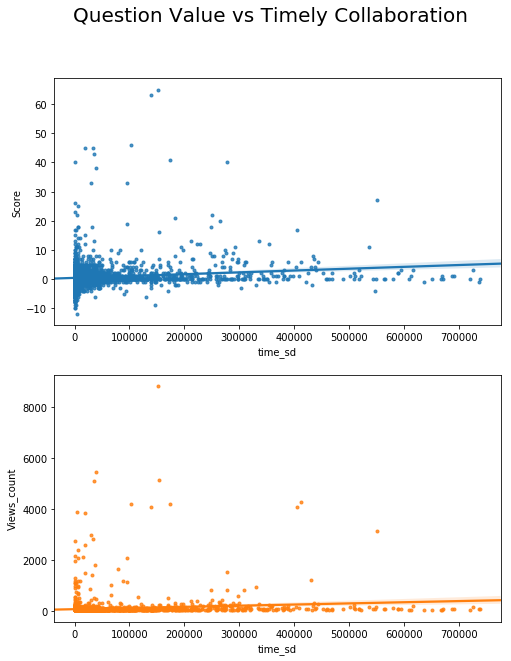

time: 898 ms


In [131]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
sns.regplot(df_comb.time_sd, df_comb.Score, marker=".", ax=ax1)
sns.regplot(df_comb.time_sd, df_comb.Views_count, marker=".", ax=ax2)

## Data transformation (unnecessary)

In [125]:
df_comb.head()

,Comment_count,Score,Views_count,post_Id,time_sd
0,0,0,28.0,48870914,254.094471
1,1,0,25.0,48870980,15352.931772
2,2,-2,27.0,48871012,35.213634
3,0,0,41.0,48871036,28004.393655
4,3,1,49.0,48871068,2456.579126


In [126]:
df_comb.Score.describe()

count    7392.000000
mean        0.563041
std         2.763697
min       -12.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        65.000000
Name: Score, dtype: float64

In [127]:
df_comb.Views_count.describe()

count    7392.000000
mean       68.018263
std       225.284426
min        10.000000
25%        36.000000
50%        47.000000
75%        61.000000
max      8821.000000
Name: Views_count, dtype: float64

In [128]:
import math
def loga(x):
    val = x+abs(min(df_comb.Score))+2
    out = 1/math.log10(val)
    return(out)

In [129]:
_min_score = abs(min(df_comb.Score)) + 2
_min_view = abs(min(df_comb.Views_count)) + 20
_min_view

30.0

In [130]:
View_log = df_comb.Views_count.apply(lambda x: 1/math.log10(x + _min_score))

In [131]:
Scores_log = df_comb.Score.apply(lambda x: 1/math.log10(x + _min_view))

In [132]:
yes = 0
no = 0
for i in df_comb.Score:
    if i < 0:
        yes += 1
    else:
        no += 1
print(yes, no)

1178 6214


## Plot of Transformed Data

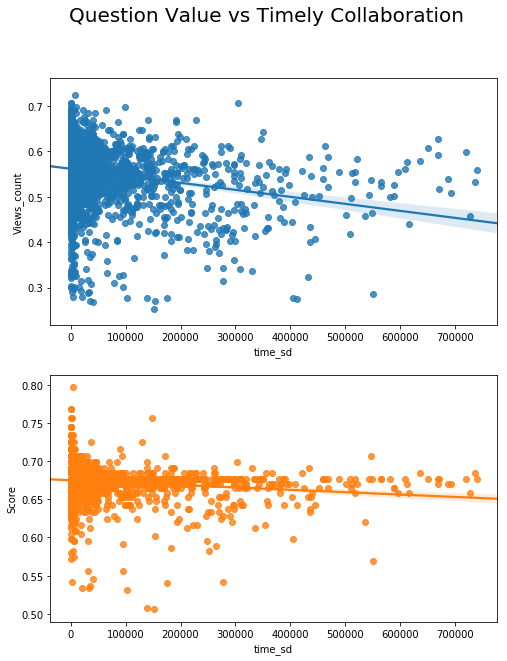

In [133]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
sns.regplot(df_comb.time_sd, View_log, ax=ax1)
sns.regplot(df_comb.time_sd, Scores_log, ax=ax2)

## Linear Model Summary

In [134]:
from scipy import stats
import statsmodels.api as sm

In [135]:
#Views
Views_model = sm.OLS(View_log, df_comb.time_sd)
Views_result = Views_model.fit()
#Score
Score_model = sm.OLS(Scores_log, df_comb.time_sd)
Score_result = Score_model.fit()

In [136]:
print(Views_result.summary())
print(Score_result.summary())

                            OLS Regression Results                            
Dep. Variable:            Views_count   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     653.7
Date:                Sun, 06 May 2018   Prob (F-statistic):          3.10e-138
Time:                        22:50:05   Log-Likelihood:                -5899.8
No. Observations:                7392   AIC:                         1.180e+04
Df Residuals:                    7391   BIC:                         1.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time_sd     2.367e-06   9.26e-08     25.568      0.0

# Probability of a question being answered as a function of time in minutes
eg. $P(\text{question is answered}|t=0,...,n , n=1,...,1440)$ for 

## Parents Post Data Wrangling

In [41]:
df_answers.head()

,Id,PostTypeId,ParentID,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,ClosedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,48870883,2,48869547.0,NaN,2018-02-19T17:05:50,1,NaN,<p>Try to add hint to the query:</p>\r\n\r\n<p...,8214734.0,8214734.0,NaN,2018-02-20T10:20:21.007,2018-02-20T10:20:21.007,NaN,NaN,NaN,NaN,NaN,2,NaN
1,48870884,2,3865445.0,NaN,2018-02-19T17:05:50,0,NaN,In support of Sean's post:\r\n\r\n<p>The place...,2055283.0,NaN,NaN,NaN,2018-02-19T17:05:50.273,NaN,NaN,NaN,NaN,NaN,0,NaN
2,48870885,2,48870539.0,NaN,2018-02-19T17:05:51,0,NaN,<p>I discovered the convention (couldn't find ...,1052870.0,NaN,NaN,NaN,2018-02-19T17:05:51.300,NaN,NaN,NaN,NaN,NaN,1,NaN
3,48870889,2,48870709.0,NaN,2018-02-19T17:06:01,0,NaN,"<p>Group by the user, then aggregate a list of...",3182843.0,NaN,NaN,NaN,2018-02-19T17:06:01.910,NaN,NaN,NaN,NaN,NaN,0,NaN
4,48870891,2,48870253.0,NaN,2018-02-19T17:06:16,12,NaN,<p>With combination of <code>re.findall()</cod...,3185459.0,3185459.0,NaN,2018-02-19T17:13:55.730,2018-02-19T17:13:55.730,NaN,NaN,NaN,NaN,NaN,8,NaN


time: 33.6 ms


In [42]:
df_answers_time.head()

,Cr_time,ParentID
0,1519059950,48869547.0
1,1519059950,3865445.0
2,1519059951,48870539.0
3,1519059961,48870709.0
4,1519059976,48870253.0


time: 12.5 ms


In [43]:
parents_time = Parents_post.CreationDate.str[:-4]

time: 56.9 ms


In [44]:
unix_parents = [date_ts(i) for i in parents_time]

time: 1.9 s


In [45]:
df_parents_time = pd.DataFrame({'Cr_time_parents':unix_parents, 'ParentID':Parents_post.Id})

time: 31.3 ms


In [46]:
df_parents_time.head()

,Cr_time_parents,ParentID
0,1519059948,48870881
1,1519059949,48870882
2,1519059952,48870886
3,1519059961,48870888
4,1519059966,48870890


time: 9.19 ms


## Merge Table & Create Columns of mins and hours

In [47]:
df_compare = pd.merge(df_parents_time, df_answers_time, on='ParentID')

time: 101 ms


In [48]:
df_compare.head()

,Cr_time_parents,ParentID,Cr_time
0,1519059948,48870881,1519060497
1,1519059948,48870881,1519061059
2,1519059949,48870882,1519060388
3,1519059949,48870882,1519060429
4,1519059952,48870886,1519060689


time: 8.12 ms


In [49]:
df_compare['Duration'] = df_compare.Cr_time - df_compare.Cr_time_parents

time: 3.25 ms


In [50]:
df_compare['Duration_mins'] = df_compare.Duration/60

time: 3.01 ms


In [51]:
df_compare['Duration_hours'] = df_compare.Duration_mins/60

time: 3.33 ms


In [52]:
df_compare.head()

,Cr_time_parents,ParentID,Cr_time,Duration,Duration_mins,Duration_hours
0,1519059948,48870881,1519060497,549,9.150000,0.152500
1,1519059948,48870881,1519061059,1111,18.516667,0.308611
2,1519059949,48870882,1519060388,439,7.316667,0.121944
3,1519059949,48870882,1519060429,480,8.000000,0.133333
4,1519059952,48870886,1519060689,737,12.283333,0.204722


time: 11.6 ms


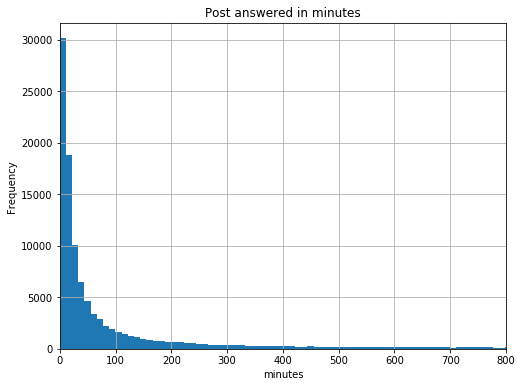

time: 5.86 s


In [53]:
#Histogram
df_compare.Duration_mins.plot(kind = 'hist', bins=5000, figsize=(8,6))
plt.xlim(0,800)
plt.xlabel('minutes')
plt.title('Post answered in minutes')
plt.grid()

In [54]:
df_compare.Duration_mins.describe()

count    121385.000000
mean        609.633554
std        1971.848971
min           0.000000
25%          11.166667
50%          35.833333
75%         216.283333
max       55468.600000
Name: Duration_mins, dtype: float64

time: 17.7 ms


In [55]:
df_compare.Duration_hours.describe()

count    121385.000000
mean         10.160559
std          32.864150
min           0.000000
25%           0.186111
50%           0.597222
75%           3.604722
max         924.476667
Name: Duration_hours, dtype: float64

time: 16.6 ms


In [56]:
neg = 0
pos = 0
for i in df_compare.Duration_hours:
    if i >= 0:
        pos += 1
    else:
        neg += 1
print(pos, neg)

#15 negative duration, possibly an error from collecting data
#ie. negative duration means answer being posted before the parents questions being posted (not possible)

121385 0
time: 29.1 ms


In [57]:
df_compare.head()

,Cr_time_parents,ParentID,Cr_time,Duration,Duration_mins,Duration_hours
0,1519059948,48870881,1519060497,549,9.150000,0.152500
1,1519059948,48870881,1519061059,1111,18.516667,0.308611
2,1519059949,48870882,1519060388,439,7.316667,0.121944
3,1519059949,48870882,1519060429,480,8.000000,0.133333
4,1519059952,48870886,1519060689,737,12.283333,0.204722


time: 14.3 ms


## Calculate Frequency and Probability of mins and hours

In [58]:
Duration_mins_rounded = df_compare.Duration_mins.round()

time: 3.12 ms


In [59]:
fre_mins = pd.DataFrame(Duration_mins_rounded.value_counts(), index=None)
fre_mins['mins'] = fre_mins.index
fre_mins = fre_mins.rename(columns={'Duration_mins':'Frequency','mins':'mins'})
fre_mins.reset_index(inplace=True, drop=True)
#drop negative mins
fre_mins.drop(fre_mins[fre_mins.mins < 0].index, inplace=True)
fre_mins = fre_mins.sort_values('mins')

time: 17.3 ms


In [60]:
fre_mins.head()

,Frequency,mins
56,337,0.0
46,455,1.0
11,2027,2.0
5,3025,3.0
1,3583,4.0


time: 7.9 ms


In [61]:
fre_mins['Probabiity'] = fre_mins.Frequency/sum(fre_mins.Frequency)

time: 2.43 ms


In [62]:
fre_mins.head()

,Frequency,mins,Probabiity
56,337,0.0,0.002776
46,455,1.0,0.003748
11,2027,2.0,0.016699
5,3025,3.0,0.024921
1,3583,4.0,0.029518


time: 9.09 ms


In [63]:
fre_mins.Probabiity.describe()

count    7470.000000
mean        0.000134
std         0.001140
min         0.000008
25%         0.000008
50%         0.000016
75%         0.000033
max         0.029600
Name: Probabiity, dtype: float64

time: 6.03 ms


## Plot (Probability)

Text(0.5,1,'Probability of Answered in terms of Minutes')

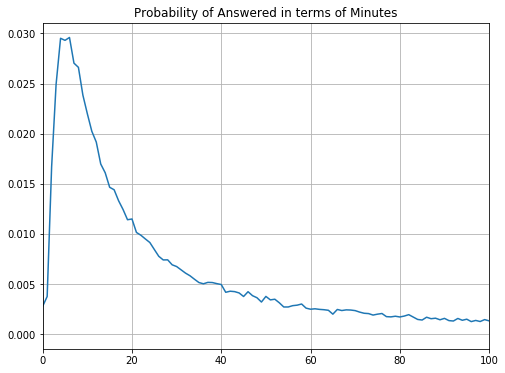

time: 139 ms


In [64]:
fig=plt.figure(figsize=(8,6))
plt.plot(fre_mins.mins, fre_mins.Probabiity)
plt.xlim(0,100)
plt.grid()
plt.title('Probability of Answered in terms of Minutes')

## Cumulative Probability 

In [65]:
fre_mins.head()

,Frequency,mins,Probabiity
56,337,0.0,0.002776
46,455,1.0,0.003748
11,2027,2.0,0.016699
5,3025,3.0,0.024921
1,3583,4.0,0.029518


time: 9.48 ms


In [66]:
fre_mins['cum_pro'] = np.cumsum(list(fre_mins.Probabiity))

time: 2.16 ms


In [67]:
fre_mins.head()

,Frequency,mins,Probabiity,cum_pro
56,337,0.0,0.002776,0.002776
46,455,1.0,0.003748,0.006525
11,2027,2.0,0.016699,0.023224
5,3025,3.0,0.024921,0.048144
1,3583,4.0,0.029518,0.077662


time: 8.94 ms


Text(0.5,0,'cumulative probability')

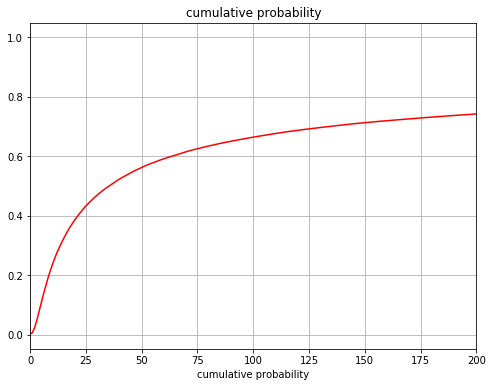

time: 154 ms


In [68]:
fig=plt.figure(figsize=(8,6))
plt.plot(fre_mins.mins, fre_mins.cum_pro, color='red')
plt.xlim(0,200)
plt.grid()
plt.title('cumulative probability')
plt.xlabel('cumulative probability')

## Summary of Probability Plots

Text(0,0.5,'probability')

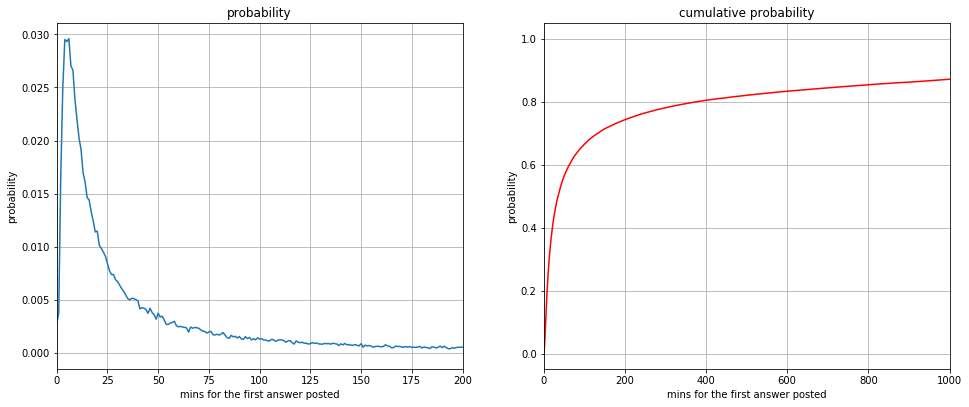

time: 369 ms


In [70]:
fig=plt.figure(figsize=(16,14))
plt.subplot(221)
plt.plot(fre_mins.mins, fre_mins.Probabiity)
plt.xlim(0,200)
plt.grid()
plt.title('probability')
plt.xlabel('mins for the first answer posted')
plt.ylabel('probability')
plt.subplot(222)
plt.plot(fre_mins.mins, fre_mins.cum_pro, color='red')
plt.xlim(0,1000)
plt.grid()
plt.title('cumulative probability')
plt.xlabel('mins for the first answer posted')
plt.ylabel('probability')

In [137]:
Posts

,Id,PostTypeId,ParentID,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,ClosedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,48870881,1,NaN,48871194.0,2018-02-19T17:05:48.193,1,50.0,<p>I have a json file with data as below:</p>\...,2804169.0,2804169.0,NaN,2018-02-19T18:42:53.487,2018-02-19T18:53:19.357,NaN,NaN,PHP search array return all values,<php><arrays>,2.0,0,NaN
1,48870882,1,NaN,48870993.0,2018-02-19T17:05:49.097,0,27.0,<p>I am currently working on a web application...,5128923.0,2598770.0,NaN,2018-02-19T17:13:33.920,2018-02-19T17:13:49.300,NaN,NaN,Creating a reactive user input tab,<c#><html><asp.net><.net><visual-studio>,2.0,0,NaN
2,48870883,2,48869547.0,NaN,2018-02-19T17:05:50.073,1,NaN,<p>Try to add hint to the query:</p>\r\n\r\n<p...,8214734.0,8214734.0,NaN,2018-02-20T10:20:21.007,2018-02-20T10:20:21.007,NaN,NaN,NaN,NaN,NaN,2,NaN
3,48870884,2,3865445.0,NaN,2018-02-19T17:05:50.273,0,NaN,In support of Sean's post:\r\n\r\n<p>The place...,2055283.0,NaN,NaN,NaN,2018-02-19T17:05:50.273,NaN,NaN,NaN,NaN,NaN,0,NaN
4,48870885,2,48870539.0,NaN,2018-02-19T17:05:51.300,0,NaN,<p>I discovered the convention (couldn't find ...,1052870.0,NaN,NaN,NaN,2018-02-19T17:05:51.300,NaN,NaN,NaN,NaN,NaN,1,NaN
5,48870886,1,NaN,NaN,2018-02-19T17:05:52.677,0,27.0,<p>So I am trying to create records in mongodb...,8353588.0,NaN,NaN,NaN,2018-02-19T17:18:09.357,NaN,NaN,Mongoose Validation Error,<node.js><mongodb><express><mongoose><mongoose...,1.0,2,NaN
6,48870888,1,NaN,48871145.0,2018-02-19T17:06:01.170,1,17.0,<p>I am trying to find out a way how add a col...,9381432.0,NaN,NaN,NaN,2018-02-19T17:21:55.740,NaN,NaN,R - Calculating annual incrementals across dif...,<r>,1.0,0,NaN
7,48870889,2,48870709.0,NaN,2018-02-19T17:06:01.910,0,NaN,"<p>Group by the user, then aggregate a list of...",3182843.0,NaN,NaN,NaN,2018-02-19T17:06:01.910,NaN,NaN,NaN,NaN,NaN,0,NaN
8,48870890,1,NaN,NaN,2018-02-19T17:06:06.810,0,19.0,<p>I need a simple and clear example on how to...,3613597.0,3613597.0,NaN,2018-02-19T17:18:00.510,2018-02-19T17:18:00.510,NaN,2018-02-19T17:09:58.357,Passing props from parent component to a neste...,<javascript><reactjs><react-native>,0.0,0,NaN
9,48870891,2,48870253.0,NaN,2018-02-19T17:06:16.113,12,NaN,<p>With combination of <code>re.findall()</cod...,3185459.0,3185459.0,NaN,2018-02-19T17:13:55.730,2018-02-19T17:13:55.730,NaN,NaN,NaN,NaN,NaN,8,NaN


# Similarity

## Load Data

In [92]:
import json
with open('../../../160-Stackoverflow-Data/300000_rows/graph_dump_load.json',\
          'r') as json_file:
    data = json.load(json_file)

## Extract Content - Answers

In [93]:
#user id (asks list)
user_id_asks = [i for i in data if 'asks' in data[i].keys()]

In [94]:
#post id (asks list)
posts_id_asks = [data[i].get('asks') for i in data if 'asks' in data[i].keys()]

In [95]:
#user id (answers list)
user_id_answers = [i for i in data if 'answers' in data[i].keys()]

In [96]:
#post id (answers list)
posts_id_answers = [data[i].get('answers') for i in data if 'answers' in data[i].keys()]

## Extract Body

In [97]:
def get_body(x):
    return(list(Posts[Posts.Id == x].Body))

In [98]:
#asks text body
asks_body = [[get_body(posts_id_asks[j][i]) for i in range(len(posts_id_asks[j]))] for j in range(len(posts_id_asks))]

In [99]:
#answers text body
answers_body = [[get_body(posts_id_answers[j][i]) for i in range(len(posts_id_answers[j]))] for j in range(len(posts_id_answers))]

## NLP

In [ ]:
def flatten(word):
    """
    param word: str in a list of list
    return: str
    """
    word = list(itertools.chain.from_iterable(word))
    word = ' '.join(word)
    return(word)

In [88]:
import itertools
import re
import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize

# characters to replace by space (for html)
BRACKETS_RE = re.compile('[/(){}\[\]\|@,;]:') 
# insignificant words

STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['<p>','</p>','\r','</code></pre>','p','<','>','``',"''"])
def clean_and_tokenize_body(text):
    """
    @param text: str - raw string
    return: str - filtered, and tokenized string
    """
    text = re.sub(BRACKETS_RE, ' ', text.lower())
    return ' '.join([w for w in word_tokenize(text) if not w in STOPWORDS])

## Calculating Similarity 

Dan takes over this parts, potential matrix run time being too long.

# Topical Strength

## Functions

In [89]:
TagSyn = pd.read_csv("../../../160-Stackoverflow-Data/tags/TagSynonyms.csv")
tagcols = pd.DataFrame(TagSyn.SourceTagName.values,TagSyn.TargetTagName,columns=['values'])

In [90]:
#Borrow Seungmi Functions
def answers_user(user_id):
    """tags of 'question' posts that the user posted 'answers' to, 
    and count the number of the user's answers for each tag
    
    @param user_id: int 
    return: series 
    """
    filtered = []
    pattern = '[<>]'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    answers_id = list(Posts.loc[(Posts.OwnerUserId == user_id) &  (Posts.PostTypeId == 2)]['ParentID'])

    for i in range(len(answers_id)):
        tags = Posts.loc[(Posts.Id == answers_id[i])]['Tags'] #extracting tags from its parent post
        
        try:
            tags1 = list(filter(None,regex.split(tags.iloc[0]))) 
            for i in range(len(tagcols)):
                if tagcols['values'][i] in tags1:
                    tags1[tags1.index(tagcols['values'][i])] = tagcols.index[i] #mapping tags to their simpliest reduction
            filtered.extend(tags1)
        except:
            continue
    freq_answers = pd.DataFrame({'Tag':filtered}).groupby('Tag').size()
    return freq_answers

In [91]:
#Borrow Seungmi Functions
def accepted_ans(user_id):
    """tags of 'question' posts that the user's answer was accepted to('AcceptedAnswer'), 
    and count the number of the user's accepted answers for each tag
    
    @param user_id: int 
    return: series 
    """
    accepted_tags = []
    pattern = '[<>]'

    regex = re.compile(pattern, flags = re.IGNORECASE)
    answers = Posts.loc[(Posts.OwnerUserId == user_id) &  (Posts.PostTypeId == 2)]

    for i in range(len(answers)):
        tags = Posts.loc[(Posts.AcceptedAnswerId == answers.Id.iloc[i])]['Tags']
        try:
            tags1 = list(filter(None,regex.split(tags.iloc[0]))) 
            for i in range(len(tagcols)):
                if tagcols['values'][i] in tags1:
                    #mapping tags to their simpliest reduction
                    tags1[tags1.index(tagcols['values'][i])] = tagcols.index[i] 
            accepted_tags.extend(tags1)
        except:
            continue
    freq_acanswers = pd.DataFrame({'Tag':accepted_tags}).groupby('Tag').size()
    return freq_acanswers

In [92]:
Comments = pd.read_csv('/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/300000_rows/Comments.csv')

In [93]:
#Borrow Seungmi Functions
import re
def comments_user(user_id):
    """tags of 'question' posts that the user posted 'comments' to, 
    and count the number of the user's comments for each tag
    
    @param user_id: int 
    return: series 
    """
    comments_tags = []
    pattern = '[<>]'


    regex = re.compile(pattern, flags = re.IGNORECASE)
    comments = Comments.loc[(Comments.UserId == user_id)]['PostId']

    for i in range(len(comments)):
        tags = Posts.loc[(Posts.Id == comments.iloc[i])]['Tags']
        try:
            tags1 = list(filter(None,regex.split(tags.iloc[0]))) 
            for i in range(len(tagcols)):
                if tagcols['values'][i] in tags1:
                    tags1[tags1.index(tagcols['values'][i])] = tagcols.index[i] #mapping tags to their simpliest reduction
            comments_tags.extend(tags1)
        except:
            continue
    freq_comments = pd.DataFrame({'Tag':comments_tags}).groupby('Tag').size()
    return freq_comments

In [94]:
#Borrow Seungmi Functions
def activities(user_id):
    """the number of activities such as answers, accepted answers and comments of the user for each tag
    
    @param user_id: int 
    return: dataframe
    """
    answers = answers_user(user_id)
    acc_answers = accepted_ans(user_id)
    comments = comments_user(user_id)
    user_table = pd.DataFrame({'Answers' : answers ,'Accepted Answers' : acc_answers , 'Comments': comments})
    user_table = user_table.fillna(0)
    if len(user_table) != 0 :
        user_table['Total'] = user_table.apply(lambda row: (row['Answers'])+(row['Accepted Answers'])+(row['Comments']), axis=1)
        
    return user_table

## Number of activities for a tags for a user vs max of this users

In [95]:
#unique users list
users_unique = list(Posts[Posts.PostTypeId == 2].OwnerUserId.unique())

In [96]:
with open('../../../160-Stackoverflow-Data/tags/all_unique_tags.txt', 'r') as f:
    tags_unique = f.readlines()

In [ ]:
#unique tags list
tags_unique = [i.rstrip() for i in tags_unique]

In [ ]:
#try not to attempt to run
#outcome is a list with ~len(tags_unique)*len(users_unique)
big_list = []
for tags in tags_unique:
    for users in users_unique:
        if tags in activities(users).index:
            spe_tags = {tags:{users:activities(users).loc[tags][3]}}
            big_list.append(spe_tags)
        else:
            big_list = big_list
max_users = max(big_list)
users_tags_ratio = [i/max_users for i in big_list]

In [ ]:
#subset version
#still takes long time to run
def topical_strength(tags):
    """
    arguments:
        tags (str): the target tags
    returns:
        list: a list with ratio of activities counts of each users/ max of the list for the input tag
    """
    tags_users = []
    for users in users_unique:
        if tags in activities(users).index:
            spe_tags = {tags:{users:activities(users).loc[tags][3]}}
            tags_users.append(spe_tags)
        else:
            tags_users = tags_users
    max_users = max(tags_users)
    users_tags_ratio = [i/max_users for i in tags_users]
    return(users_tags_ratio)

# Sandbox

In [ ]:
TagSyn_sub = pd.DataFrame({'Source':TagSyn.SourceTagName,'Target':TagSyn.TargetTagName})

In [ ]:
#transformation to target tags
def tags_syn(input_set):
    """change tags to target tag
    
    argument:
        input_set - list, the list of input tags
    returns:
        list - the list with transformed target tags
    """
    for i in range(len(TagSyn_sub)):
        if TagSyn_sub.Source[i] in input_set:
            input_set[input_set.index(TagSyn_sub.Source[i])] = TagSyn_sub.Target[i]
    return(input_set)